In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# **NADILA IMAARAH 3323600015 D4 SAINS DATA TERAPAN A**

# 1. Load dataset dan tampilkan

In [13]:
dataset = pd.read_csv('transaction.csv')
print("Dataset:")
dataset.head()

Dataset:


,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


# 2. ambillah data pada dataset untuk fitur InvoiceNo, Country, month, year (“2011”)

In [21]:
# 2. Konversi InvoiceDate ke datetime dan ambil fitur InvoiceNo, Country, month, year 
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
data = dataset[['InvoiceNo', 'Country', 'InvoiceDate']].copy()
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

# Filter hanya tahun 2011
data = data[data['year'] == 2011]
print("\nData setelah filter tahun 2011 dan ekstraksi fitur:")
data.head()


Data setelah filter tahun 2011 dan ekstraksi fitur:


,InvoiceNo,Country,InvoiceDate,month,year
3,542237,Iceland,2011-01-26 14:30:00,1,2011
4,542237,Iceland,2011-01-26 14:30:00,1,2011
5,542237,Iceland,2011-01-26 14:30:00,1,2011
6,542237,Iceland,2011-01-26 14:30:00,1,2011
7,542237,Iceland,2011-01-26 14:30:00,1,2011


# Tahap NO 3-8

In [25]:
transaksi_tinggi = []

for i in range(1, 13):
    print(f"\n--- Bulan ke-{i} ---")
    
    # 3. Data bulan ke-i
    data_bulan = data[data['month'] == i]
    print(f"Data bulan ke-{i} (sample):")
    print(data_bulan.head(1))
    
    # 4. Hitung transaksi per negara (InvoiceNo unik per Country)
    
    transaksi = data_bulan.drop_duplicates(subset=['InvoiceNo', 'Country'])
    transaksi_per_country = transaksi.groupby('Country')['InvoiceNo'].nunique().reset_index()
    transaksi_per_country.columns = ['Country', 'TransactionCount']
    print("Transaksi per negara:")
    print(transaksi_per_country)
    
    # Jika data negara kurang dari 3, append 0 dan lanjut ke bulan berikutnya
    if len(transaksi_per_country) < 3:
        print(f"Data kurang dari 3 negara, lewati clustering bulan {i}.")
        transaksi_tinggi.append(0)
        continue
    
    # 5. Clustering dengan AgglomerativeClustering (Average Linkage, k=3)
    clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
    clustering.fit(transaksi_per_country[['TransactionCount']])
    transaksi_per_country['Cluster'] = clustering.labels_
    print("Hasil clustering:")
    print(transaksi_per_country)
    
    # 6. Tentukan centroid (rata-rata transaksi tiap cluster)
    centroid = transaksi_per_country.groupby('Cluster')['TransactionCount'].mean().reset_index()
    print("Centroid per cluster:")
    print(centroid)
    
    # 7. Urutkan centroid ascending berdasarkan TransactionCount
    sorted_centroid = centroid.sort_values(by='TransactionCount').reset_index(drop=True)
    print("Centroid setelah diurutkan (ascending):")
    print(sorted_centroid)
    
    # 8. Ambil nilai tertinggi (indeks terakhir)
    nilai_tertinggi = sorted_centroid.loc[len(sorted_centroid) - 1, 'TransactionCount']
    transaksi_tinggi.append(nilai_tertinggi)
    print(f"Nilai transaksi tertinggi bulan {i}: {nilai_tertinggi}")


--- Bulan ke-1 ---
Data bulan ke-1 (sample):
   InvoiceNo  Country         InvoiceDate  month  year
3     542237  Iceland 2011-01-26 14:30:00      1  2011
Transaksi per negara:
            Country  TransactionCount
0         Australia                 5
1           Belgium                 3
2   Channel Islands                 1
3            Cyprus                 1
4              EIRE                 7
5           Finland                 1
6            France                26
7           Germany                28
8            Greece                 1
9           Iceland                 1
10            Italy                 3
11          Lebanon                 1
12      Netherlands                 4
13           Poland                 1
14         Portugal                 4
15        Singapore                 1
16            Spain                 7
17           Sweden                 2
18      Switzerland                 3
Hasil clustering:
            Country  TransactionCount  Clust

# 9. Visualisasikan pergerakan nilai transaksi_tinggi dimana sumbu x=month(1-12) dan sumbu y=transaksi_tinggi (centroid ini yang di visualisasikan tetringgi pada bulan 1-13)


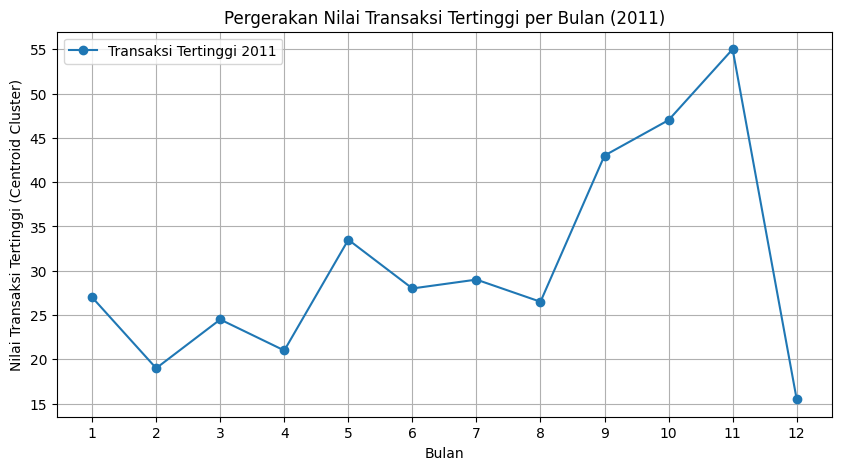

In [16]:
# 9. Visualisasi pergerakan nilai transaksi_tinggi bulan 1-12
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), transaksi_tinggi, marker='o', label='Transaksi Tertinggi 2011')
plt.title('Pergerakan Nilai Transaksi Tertinggi per Bulan (2011)')
plt.xlabel('Bulan')
plt.ylabel('Nilai Transaksi Tertinggi (Centroid Cluster)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# 10. PredictedVal = prediksikan nilai transaksi tinggi dari transaksi_tinggi untuk bulan Januari 2012 dengan Linear Regression

Prediksi nilai transaksi tinggi untuk Januari 2012: 40.86


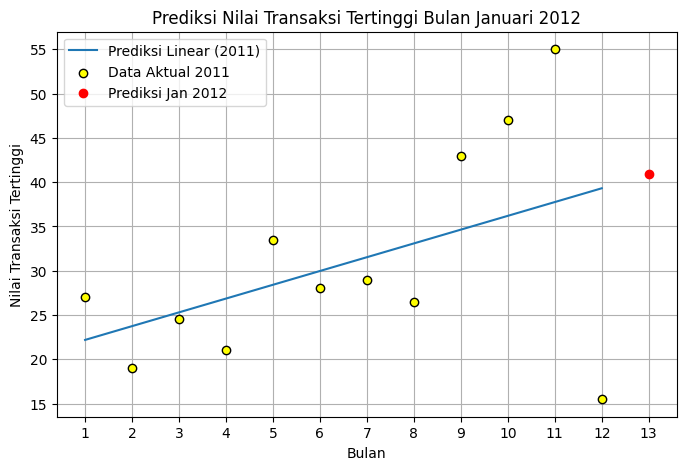

In [17]:
# 10. Prediksi nilai transaksi tinggi untuk bulan Januari 2012 dengan Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#Nilai bulan 1-12
X = np.array(range(1, 13)).reshape(-1, 1)
y = np.array(transaksi_tinggi)             

model = LinearRegression()
model.fit(X, y)
# nilai prediksi pada bulan januari 2012
bulan_prediksi = np.array([[13]])  
prediksi_jan_2012 = model.predict(bulan_prediksi)[0]
print(f"Prediksi nilai transaksi tinggi untuk Januari 2012: {prediksi_jan_2012:.2f}")

# Visualisasi nilai pada bulan 1-12 2011
plt.figure(figsize=(8, 5))
plt.plot(range(1, 13), model.predict(X), label='Prediksi Linear (2011)')
plt.scatter(range(1, 13), transaksi_tinggi, color='yellow', edgecolor='black', label='Data Aktual 2011', zorder=5)

# Visualisasi nilai pada bulan januari 2012
plt.scatter(13, prediksi_jan_2012, color='red', label='Prediksi Jan 2012', zorder=10)

plt.title('Prediksi Nilai Transaksi Tertinggi Bulan Januari 2012')
plt.xlabel('Bulan')
plt.ylabel('Nilai Transaksi Tertinggi')
plt.xticks(list(range(1, 14)))
plt.legend()
plt.grid(True)
plt.show()



Dataset:
   InvoiceNo  StockCode  Qty      InvoiceDate  CustomerID  Country
0     537626      22725  830  12/7/2010 14:57       12347  Iceland
1     537626      22729  948  12/7/2010 14:57       12347  Iceland
2     537626      22195  695  12/7/2010 14:57       12347  Iceland
3     542237      22725  636  1/26/2011 14:30       12347  Iceland
4     542237      22729  536  1/26/2011 14:30       12347  Iceland

Data setelah filter tahun 2011 dan ekstraksi fitur:
   InvoiceNo  Country         InvoiceDate  month  year
3     542237  Iceland 2011-01-26 14:30:00      1  2011
4     542237  Iceland 2011-01-26 14:30:00      1  2011
5     542237  Iceland 2011-01-26 14:30:00      1  2011
6     542237  Iceland 2011-01-26 14:30:00      1  2011
7     542237  Iceland 2011-01-26 14:30:00      1  2011

--- Bulan ke-1 ---
Data bulan ke-1 (sample):
   InvoiceNo  Country         InvoiceDate  month  year
3     542237  Iceland 2011-01-26 14:30:00      1  2011
Transaksi per negara:
            Country  Transac

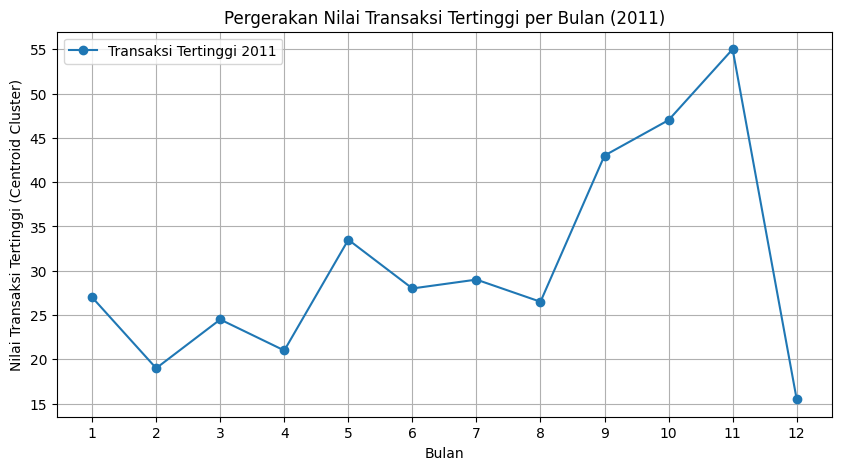

Prediksi nilai transaksi tinggi untuk Januari 2012: 40.86


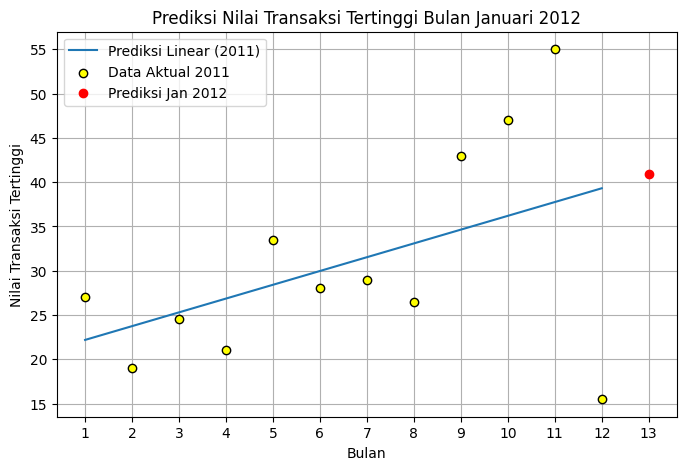

In [26]:
# 1. Load dataset dan tampilkan
dataset = pd.read_csv('transaction.csv')
print("Dataset:")
print(dataset.head())

# 2. Konversi InvoiceDate ke datetime dan ambil fitur yang diperlukan
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
data = dataset[['InvoiceNo', 'Country', 'InvoiceDate']].copy()
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

# Filter hanya tahun 2011
data = data[data['year'] == 2011]
print("\nData setelah filter tahun 2011 dan ekstraksi fitur:")
print(data.head())

transaksi_tinggi = []

for i in range(1, 13):
    print(f"\n--- Bulan ke-{i} ---")
    
    # 3. Data bulan ke-i
    data_bulan = data[data['month'] == i]
    print(f"Data bulan ke-{i} (sample):")
    print(data_bulan.head(1))
    
    # 4. Hitung transaksi per negara (InvoiceNo unik per Country)
    
    transaksi = data_bulan.drop_duplicates(subset=['InvoiceNo', 'Country'])
    transaksi_per_country = transaksi.groupby('Country')['InvoiceNo'].nunique().reset_index()
    transaksi_per_country.columns = ['Country', 'TransactionCount']
    print("Transaksi per negara:")
    print(transaksi_per_country)
    
    # Jika data negara kurang dari 3, append 0 dan lanjut ke bulan berikutnya
    if len(transaksi_per_country) < 3:
        print(f"Data kurang dari 3 negara, lewati clustering bulan {i}.")
        transaksi_tinggi.append(0)
        continue
    
    # 5. Clustering dengan AgglomerativeClustering (Average Linkage, k=3)
    clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
    clustering.fit(transaksi_per_country[['TransactionCount']])
    transaksi_per_country['Cluster'] = clustering.labels_
    print("Hasil clustering:")
    print(transaksi_per_country)
    
    # 6. Tentukan centroid (rata-rata transaksi tiap cluster)
    centroid = transaksi_per_country.groupby('Cluster')['TransactionCount'].mean().reset_index()
    print("Centroid per cluster:")
    print(centroid)
    
    # 7. Urutkan centroid ascending berdasarkan TransactionCount
    sorted_centroid = centroid.sort_values(by='TransactionCount').reset_index(drop=True)
    print("Centroid setelah diurutkan (ascending):")
    print(sorted_centroid)
    
    # 8. Ambil nilai tertinggi (indeks terakhir)
    nilai_tertinggi = sorted_centroid.loc[len(sorted_centroid) - 1, 'TransactionCount']
    transaksi_tinggi.append(nilai_tertinggi)
    print(f"Nilai transaksi tertinggi bulan {i}: {nilai_tertinggi}")

# 9. Visualisasi pergerakan nilai transaksi_tinggi bulan 1-12
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), transaksi_tinggi, marker='o', label='Transaksi Tertinggi 2011')
plt.title('Pergerakan Nilai Transaksi Tertinggi per Bulan (2011)')
plt.xlabel('Bulan')
plt.ylabel('Nilai Transaksi Tertinggi (Centroid Cluster)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# 10. Prediksi nilai transaksi tinggi untuk bulan Januari 2012 dengan Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array(range(1, 13)).reshape(-1, 1)  # Bulan 1-12
y = np.array(transaksi_tinggi)             # Nilai transaksi tertinggi bulan 1-12

model = LinearRegression()
model.fit(X, y)

bulan_prediksi = np.array([[13]])  # Bulan Januari 2012
prediksi_jan_2012 = model.predict(bulan_prediksi)[0]
print(f"Prediksi nilai transaksi tinggi untuk Januari 2012: {prediksi_jan_2012:.2f}")

# Visualisasi hasil prediksi dan data aktual
plt.figure(figsize=(8, 5))

# Plot tren prediksi linear dari data 2011
plt.plot(range(1, 13), model.predict(X), label='Prediksi Linear (2011)')

# Titik data aktual bulan 1-12 (kuning dengan garis tepi hitam)
plt.scatter(range(1, 13), transaksi_tinggi, color='yellow', edgecolor='black', label='Data Aktual 2011', zorder=5)

# Titik prediksi bulan 13 (merah)
plt.scatter(13, prediksi_jan_2012, color='red', label='Prediksi Jan 2012', zorder=10)

plt.title('Prediksi Nilai Transaksi Tertinggi Bulan Januari 2012')
plt.xlabel('Bulan')
plt.ylabel('Nilai Transaksi Tertinggi')
plt.xticks(list(range(1, 14)))
plt.legend()
plt.grid(True)
plt.show()